In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F # helps your data move forward from one hiddent layer to the next



In [16]:

# create a model class that inherits nn module
class Model(nn.Module):
  # Input layer(4 feautures of the flower)
  # Hidden layer 1 (nr of neurons )
  # hidden layer 2 (nr of neurons )
  #output ( outputs one of 3 classes)
  def __init__(self, in_features=4,h1=8,h2=9,out_feature = 3 ):
    super().__init__() # instantiate the nn model
    self.fc1 = nn.Linear(in_features,h1) # because all layers and neurons are fully connected(fc1)
    self.fc2 = nn.Linear(h1,h2) # this explains the follow of data,from input features to 1st layer, moves to 2nd layer , moves to output
    self.out = nn.Linear(h2,out_feature)
    # this function moves everything forward from how data must move around based on the above function
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x



In [26]:
# pick a manual seed for randomization , seed [generating randomness ]= like shuffling data, initializing model weights,
torch.manual_seed(32)
# create an instance of model
model = Model()

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [28]:
#loading the data
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [29]:
# checking if data has been loaded
my_df.head() # shows 1st top rows
my_df.tail() # shows last few rows
my_df # tries to show everything

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [30]:
# lets change the words in the last col to numbers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df


/tmp/ipython-input-30-1344507092.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [31]:
# train test split X,Y
# X is the feature
# Y is the outcome , which is the last col 'variety '
X = my_df.drop('variety',axis=1)
y = my_df['variety']


In [32]:
# convert x ,y to numpy arrays
X = X.values
y=y.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
from sklearn.model_selection import train_test_split



In [34]:
# TRAIN TEST SPLIT 80% train 20% test
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=32)
# Setting random_state=32 ensures that every time you run the code, the split between training and testing data is exactly the same.

In [35]:
# convert th above to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [36]:
# Set the criterion of model to measure the error, how far off the predictions are from the data ( loss fuction )
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer(Adjusts weights based on the loss), lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
# learning rate (Controls how big each learning step is)the lower the lr the longer it takes to train the model,
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # model parameters are l1,l2, output defined above

In [37]:
# train the model
# nr of epochs (how many runs through the training data )
epochs =100
losses = [] #appending the losses , they should be decreasing
for i in range(epochs) : # this is where we are training the data
  #go forward and get a prediction
  y_pred = model.forward(X_train) # get prediciton result

 # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # PRINT every 10 epochs
  if i%10 == 0 :
    print(f'Epoch: {i} and loss: {loss}')

  # back propagation : feed back error to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.9570867419242859
Epoch: 20 and loss: 0.7980871796607971
Epoch: 30 and loss: 0.6327950358390808
Epoch: 40 and loss: 0.43861737847328186
Epoch: 50 and loss: 0.290453165769577
Epoch: 60 and loss: 0.17780695855617523
Epoch: 70 and loss: 0.11584118008613586
Epoch: 80 and loss: 0.0893637090921402
Epoch: 90 and loss: 0.07752915471792221


Text(0.5, 0, 'Epoch')

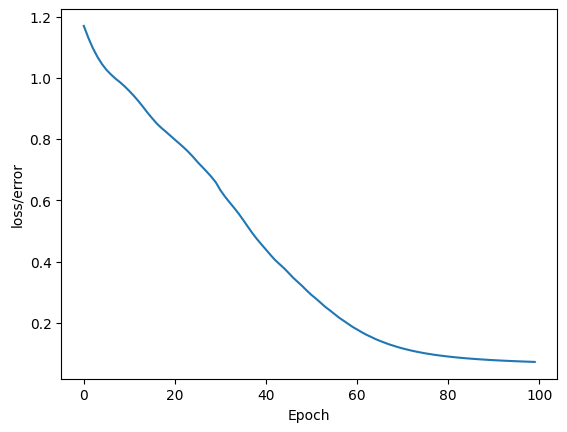

In [38]:
# graphing the losses
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

# from graph from 60 to 200  the loss converges


In [39]:
# validating the model on a test set
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error



In [40]:
loss

tensor(0.0538)

In [41]:
correct =  0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')  # shows which items are correct/incorrect
  # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')
# after changing the seed and random state to 32, the results improved

1.)  tensor([-3.3646,  3.9392,  0.3720]) 	 1 	 1
2.)  tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0
3.)  tensor([  6.5957,   1.5027, -10.4091]) 	 0 	 0
4.)  tensor([-3.3331,  4.2594,  0.0623]) 	 1 	 1
5.)  tensor([-7.3782,  2.8087,  5.1605]) 	 2 	 2
6.)  tensor([-7.3760,  3.9013,  4.2826]) 	 2 	 2
7.)  tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0
8.)  tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0
9.)  tensor([-2.6753,  4.3091, -0.6392]) 	 1 	 1
10.)  tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0
11.)  tensor([-3.8318,  4.4027,  0.5246]) 	 1 	 1
12.)  tensor([-8.6807,  1.9994,  6.8923]) 	 2 	 2
13.)  tensor([-2.0678,  3.8200, -0.7571]) 	 1 	 1
14.)  tensor([-1.0768,  4.3741, -2.2838]) 	 1 	 1
15.)  tensor([-7.4965,  2.6207,  5.3287]) 	 2 	 2
16.)  tensor([-8.6136,  1.5508,  7.1186]) 	 2 	 2
17.)  tensor([-3.7761,  3.6462,  0.9487]) 	 1 	 1
18.)  tensor([-6.7608,  2.7754,  4.5281]) 	 2 	 2
19.)  tensor([-1.7048,  4.1980, -1.4670]) 	 1 	 1
20.)  tensor([  7.7757,   1.3740, -11.8864])

In [42]:
#giving the model new data point and see what type of iris flower it is


new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [43]:
# feeding this into the model
with torch.no_grad():
  print(model(new_iris))

# the biggest nr is the model prediction


tensor([  6.8839,   1.2461, -10.5586])


In [44]:
new1_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model(new1_iris))





tensor([-6.7321,  2.6617,  4.5484])


In [45]:
# save nn model
torch.save(model.state_dict(),'iris_model.pt')


In [47]:
# loading saved model

new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [48]:
# Make sure it loaded correctly
new_model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)